In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
!pip install bs4
!pip install contractions

  Using cached contractions-0.0.48-py2.py3-none-any.whl (6.4 kB)
  Using cached textsearch-0.0.21-py2.py3-none-any.whl (7.5 kB)
  Using cached pyahocorasick-1.4.2.tar.gz (321 kB)
  Running setup.py clean for pyahocorasick
Failed to build pyahocorasick
    Running setup.py install for pyahocorasick: started
    Running setup.py install for pyahocorasick: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\t0244374\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\t0244374\\AppData\\Local\\Temp\\pip-install-nt2x0f1l\\pyahocorasick\\setup.py'"'"'; __file__='"'"'C:\\Users\\t0244374\\AppData\\Local\\Temp\\pip-install-nt2x0f1l\\pyahocorasick\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\t0244374\AppData\Local\Temp\pip-wheel-zxpqwj59'
       cwd: C:\Users\t0244374\AppData\Local\Temp\pip-install-nt2x0f1l\pyahocorasick\
  Complete output (5 lines):
  running bdist_wheel
  running build
  running build_ext
  building 'ahocorasick' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  ---------------------------------

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
reviews = pd.read_csv('../dataset/Reviews.csv')

In [7]:
# reviews = reviews.iloc[:20000]

In [8]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
reviews.iloc[10].Text

"I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!"

In [10]:
reviews.iloc[10].Summary

'The Best Hot Sauce in the World'

In [11]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


## Get Total unique Products

In [12]:
reviews.nunique()

Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218416
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295742
Text                      393579
dtype: int64

In [13]:
reviews.isnull().sum()
# ProfileName doesnt matter since UserId and ProfileName is same. So If UserId is present then we should not care about ProfileName

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [14]:
# users who didnt provide Summary
reviews[reviews.Summary.isnull()].UserId.value_counts()

A3TJPSWY2HE4BS    25
A15AMT9T9A1309     1
A22R17YPXEULEZ     1
Name: UserId, dtype: int64

In [15]:
# How many users provided, respective ratings
reviews.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

<AxesSubplot:>

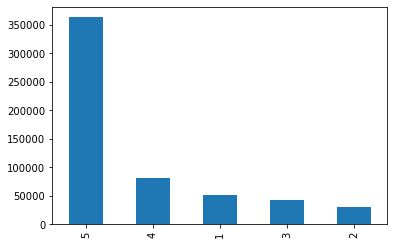

In [16]:
reviews.Score.value_counts().plot.bar()

In [17]:
# Most of the reviews are positive, So ppl do like food , Average of the Score is 4.1
reviews.Score.mean()

4.183198640523243

In [18]:
import datetime
lol = lambda x: datetime.datetime.fromtimestamp(x)
reviews['Date'] = reviews.Time.apply(lol)

In [19]:
reviews['weekDay_Time'] = reviews.Date.dt.weekday
reviews['month'] = reviews.Date.dt.month
reviews['quarter'] = reviews.Date.dt.quarter

In [20]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Date,weekDay_Time,month,quarter
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27 05:30:00,2,4,2
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07 05:30:00,4,9,3
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18 05:30:00,0,8,3
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13 05:30:00,0,6,2
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21 05:30:00,6,10,4


<AxesSubplot:xlabel='weekDay_Time', ylabel='count'>

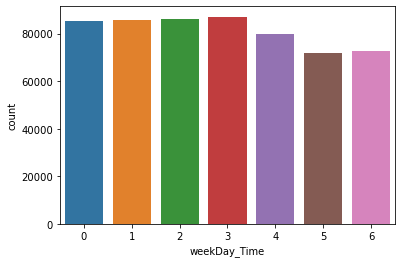

In [21]:
sns.countplot(data=reviews, x='weekDay_Time')

<AxesSubplot:xlabel='month', ylabel='count'>

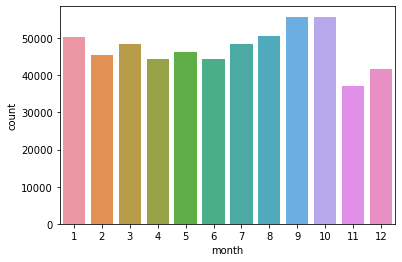

In [22]:
sns.countplot(data=reviews, x='month')

<AxesSubplot:xlabel='quarter', ylabel='count'>

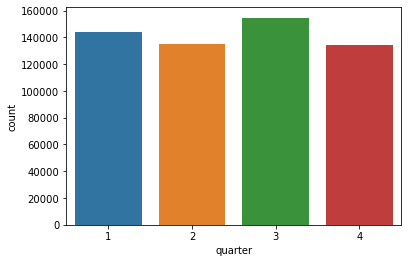

In [23]:
sns.countplot(data=reviews, x='quarter')

In [24]:
reviews = reviews[~reviews.Summary.isnull()]
reviews=reviews.reset_index(drop=True)

## Lets do Some EDA on the Text Data

### Lets preprocess convert everything to Lower Case

In [25]:
reviews.Text = reviews.Text.str.lower()
reviews.Summary = reviews.Summary.str.lower()

In [26]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Date,weekDay_Time,month,quarter
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good quality dog food,i have bought several of the vitality canned d...,2011-04-27 05:30:00,2,4,2
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,not as advertised,product arrived labeled as jumbo salted peanut...,2012-09-07 05:30:00,4,9,3
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""delight"" says it all",this is a confection that has been around a fe...,2008-08-18 05:30:00,0,8,3
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,cough medicine,if you are looking for the secret ingredient i...,2011-06-13 05:30:00,0,6,2
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,great taffy,great taffy at a great price. there was a wid...,2012-10-21 05:30:00,6,10,4


In [27]:
Text_data = reviews.Text.values
Summary = reviews.Summary.values

## do we have similar Summariaes?

In [28]:
reviews[reviews.Text.duplicated()]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Date,weekDay_Time,month,quarter
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,the best hot sauce in the world,i don't know if it's the cactus or the tequila...,2005-02-08 05:30:00,1,2,1
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"one bite and you'll become a ""chippoisseur""","i'm addicted to salty and tangy flavors, so wh...",2009-01-12 05:30:00,0,1,1
603,604,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,1,1,5,1229385600,"one bite and you'll become a ""chippoisseur""","i'm addicted to salty and tangy flavors, so wh...",2008-12-16 05:30:00,1,12,4
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,pok chops,the pork chops from omaha steaks were very tas...,2011-08-07 05:30:00,6,8,3
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,below standard,too much of the white pith on this orange peel...,2005-09-25 05:30:00,6,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568382,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,quality & affordable food,i was very pleased with the ingredient quality...,2011-07-03 05:30:00,6,7,3
568383,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,my main reason for the five star review has to...,2012-03-29 05:30:00,3,3,1
568384,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,happy camper,i bought this to try on two registered maine c...,2011-10-25 05:30:00,1,10,4
568385,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,two siberians like it!,when we brought home two 3-month-old purebred ...,2012-05-08 05:30:00,1,5,2


In [29]:

Total_len = len(Summary)
Total_distinct_Summary = len(set(Summary))
print(Total_len)
print(Total_distinct_Summary)

568427
275162


## do we have similar Text Data?

In [30]:

Total_len = len(Text_data)
Total_distinct_Text_data = len(set(Text_data))
print(Total_len)
print(Total_distinct_Text_data)

568427
393565


## ok lets drop the similar Text Data

In [31]:
reviews = reviews.drop_duplicates('Text')
reviews = reviews.reset_index(drop=True)

In [32]:
Text_data = reviews.Text.values
Summary = reviews.Summary.values

In [33]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


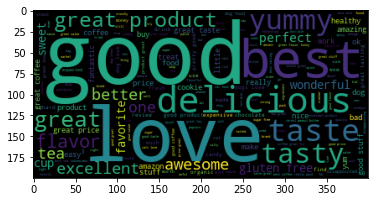

In [34]:
from wordcloud import WordCloud, STOPWORDS
summaryWordCloud = ' '.join(Summary).lower()
wordcloud2 = WordCloud().generate(summaryWordCloud)
plt.imshow(wordcloud2)

In [35]:
# TextWordCloud = ' '.join(Text_data).lower()
# wordcloud2 = WordCloud().generate(TextWordCloud)
# plt.imshow(wordcloud2)

## Word Cloud for our Data. Looks COOL

## Remove HTML Tags

In [36]:
from bs4 import BeautifulSoup
soup = lambda text:BeautifulSoup(text)
passText = lambda text:soup(text).get_text()

reviews.Text = reviews.Text.apply(passText)

## Histogram for the length of reviews and summary

<AxesSubplot:ylabel='Frequency'>

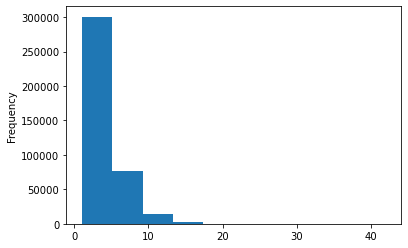

In [37]:
reviews.Summary.apply(lambda x:len(x.split(' '))).plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

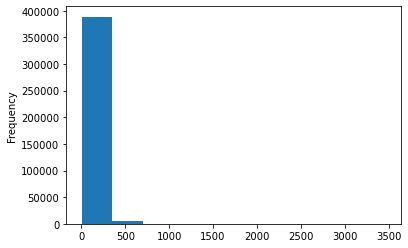

In [38]:
reviews.Text.apply(lambda x:len(x.split(' '))).plot(kind='hist')

In [39]:
reviews.Text.apply(lambda x:len(x.split(' '))).quantile(0.95)

214.0

In [40]:
input_characters = set()
target_characters = set()

In [41]:
import re

In [42]:
from nltk.tokenize import TweetTokenizer
tweet = TweetTokenizer()

In [50]:
pip install contractions

  Using cached contractions-0.0.48-py2.py3-none-any.whl (6.4 kB)
  Using cached textsearch-0.0.21-py2.py3-none-any.whl (7.5 kB)
  Using cached pyahocorasick-1.4.2.tar.gz (321 kB)
  Running setup.py clean for pyahocorasick
Failed to build pyahocorasick
    Running setup.py install for pyahocorasick: started
    Running setup.py install for pyahocorasick: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\t0244374\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\t0244374\\AppData\\Local\\Temp\\pip-install-zbsempa5\\pyahocorasick\\setup.py'"'"'; __file__='"'"'C:\\Users\\t0244374\\AppData\\Local\\Temp\\pip-install-zbsempa5\\pyahocorasick\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\t0244374\AppData\Local\Temp\pip-wheel-emrip465'
       cwd: C:\Users\t0244374\AppData\Local\Temp\pip-install-zbsempa5\pyahocorasick\
  Complete output (5 lines):
  running bdist_wheel
  running build
  running build_ext
  building 'ahocorasick' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  ---------------------------------

In [49]:

import contradiction

ModuleNotFoundError: No module named 'contradiction'

In [46]:
sampleReview = reviews.iloc[:20000].copy()

#Fix Contradiction
sampleReview.Text = sampleReview.Text.apply(lambda x: contractions.fix(x))
sampleReview.Summary = sampleReview.Summary.apply(lambda x: contractions.fix(x))

sampleReview.Text = sampleReview.Text.apply(lambda x: tweet.tokenize(x))
sampleReview.Summary = sampleReview.Summary.apply(lambda x: tweet.tokenize(x))

NameError: name 'contractions' is not defined

In [ ]:
sampleReview.head()

In [ ]:
sampleReview.Text = sampleReview.Text.apply(lambda tokens: [word for word in tokens if word.isalpha()])
sampleReview.Summary = sampleReview.Summary.apply(lambda tokens: [word for word in tokens if word.isalpha()])

In [ ]:
pip install nltk

In [ ]:
pip install stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words()
stop_words = set(stop_words)

In [ ]:
len(sampleReview.Text)

In [ ]:
%%time
sampleReview.Text = sampleReview.Text.apply(lambda tokens: [word for word in tokens if word not in stop_words][:100])

In [ ]:
sampleReview.head()

In [ ]:
# from nltk.corpus import wordnet
# sampleReview.Text = sampleReview.Text.apply(lambda tokens: [word for word in tokens if wordnet.synsets(word)])
# sampleReview.Summary = sampleReview.Summary.apply(lambda tokens: [word for word in tokens if wordnet.synsets(word)])

In [ ]:
sampleReview.Summary = sampleReview.Summary.apply(lambda x:['<BOS>']+x+['<EOS>'])

In [ ]:
sampleReview.Text = sampleReview.Text.apply(lambda x:' '.join(x))
sampleReview.Summary = sampleReview.Summary.apply(lambda x:' '.join(x))

In [ ]:
sampleReview.Summary

In [ ]:
input_texts = sampleReview.Text.values
target_texts = list(sampleReview.Summary.values)

In [ ]:
sampleReview.to_csv('filtered_data.csv', index=False)

In [ ]:
pip install keras

In [ ]:
from keras.preprocessing.text import Tokenizer
VOCAB_SIZE = 50000

tokenizerText = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
tokenizerText.fit_on_texts(input_texts)

tokenizerSummary = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
tokenizerSummary.fit_on_texts(target_texts)


def text2seq(encoder_text, decoder_text, VOCAB_SIZE):
  encoder_sequences = tokenizerText.texts_to_sequences(encoder_text)
  decoder_sequences = tokenizerSummary.texts_to_sequences(decoder_text)
  
  return encoder_sequences, decoder_sequences

encoder_sequences, decoder_sequences = text2seq(input_texts, target_texts, VOCAB_SIZE) 

In [ ]:
textVocabSize = len(tokenizerText.word_index)
summaryVocabSize = len(tokenizerSummary.word_index)
textVocabSize, summaryVocabSize

In [ ]:
def vocab_creater(text_lists, VOCAB_SIZE, tokenizer):

  dictionary = tokenizer.word_index
  
  word2idx = {}
  idx2word = {}
  for k, v in dictionary.items():
      if v < VOCAB_SIZE:
          word2idx[k] = v
          idx2word[v] = k
      if v >= VOCAB_SIZE-1:
          continue
          
  return word2idx, idx2word

word2idxText, idx2wordText = vocab_creater(input_texts, textVocabSize, tokenizerText)
word2idxSummary, idx2wordSummary = vocab_creater(target_texts, summaryVocabSize, tokenizerSummary)

In [ ]:
EMBEDDING_DIM=100
maxLenText=100
maxLenSummary=40

In [ ]:
from keras.preprocessing.sequence import pad_sequences

def padding(encoder_sequences, decoder_sequences, maxLenText, maxLenSummary):
  
  encoder_input_data = pad_sequences(encoder_sequences, maxlen=maxLenText, dtype='int32', padding='post', truncating='post')
  decoder_input_data = pad_sequences(decoder_sequences, maxlen=maxLenSummary, dtype='int32', padding='post', truncating='post')
  
  return encoder_input_data, decoder_input_data

encoder_input_data, decoder_input_data = padding(encoder_sequences, decoder_sequences,maxLenText, maxLenSummary)

In [ ]:
encoder_input_data.shape

In [ ]:
def glove_100d_dictionary():
  embeddings_index = {}
  f = open('../input/glove-global-vectors-for-word-representation/glove.6B.100d.txt')
  for line in f:
      values = line.split()
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs
  f.close()
  return embeddings_index

In [ ]:
embeddings_index = glove_100d_dictionary()

In [ ]:
def embedding_matrix_creater(embedding_dimention, tokenizer):
  embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dimention))
  for word, i in tokenizer.word_index.items():
      embedding_vector = embeddings_index.get(word)
      if embedding_vector is not None:
          # words not found in embedding index will be all-zeros.
          embedding_matrix[i] = embedding_vector
  return embedding_matrix


In [ ]:
embeddingMatrixText = embedding_matrix_creater(100, tokenizerText)
embeddingMatrixSummary = embedding_matrix_creater(100, tokenizerSummary)

In [ ]:
embeddingMatrixText.shape

In [ ]:
from keras.layers import Embedding
encoder_embedding_layer = Embedding(input_dim = textVocabSize+1, 
                                    output_dim = 100,
                                    input_length = maxLenText,
                                    mask_zero=True,
                                    weights = [embeddingMatrixText],
                                    trainable = False)
decoder_embedding_layer = Embedding(input_dim = summaryVocabSize+1, 
                                    output_dim = 100,
                                    input_length = maxLenSummary,
                                    mask_zero=True,
                                    weights = [embeddingMatrixSummary],
                                    trainable = False)

In [ ]:
# sampleReview.Text = sampleReview.Text.apply(lambda tokens: [contractions[word] for word in tokens if word.isalpha()])
# sampleReview.Summary = sampleReview.Summary.apply(lambda tokens: [contractions[word] for word in tokens if word.isalpha()])

In [ ]:
pip install pydot

In [ ]:

from numpy.random import seed
seed(1)

from sklearn.model_selection import train_test_split
import logging

import matplotlib.pyplot as plt
import pandas as pd
import pydot


import keras
from keras import backend as k
k.set_learning_phase(1)
from keras.preprocessing.text import Tokenizer
from keras import initializers
from keras.optimizers import RMSprop,Adam
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM,Dropout,Input,Activation,Add,concatenate, Embedding, RepeatVector
from keras.layers.advanced_activations import LeakyReLU,PReLU
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam

from keras.layers import TimeDistributed


In [ ]:
MAX_LEN = 100
EMBEDDING_DIM = 100
HIDDEN_UNITS = 300
textVocabSize = textVocabSize+1
summaryVocabSize = summaryVocabSize+1 
LEARNING_RATE = 0.002
BATCH_SIZE = 8
EPOCHS = 5

In [ ]:
# input_characters = sorted(list(input_characters))+[' ']
# target_characters = sorted(list(target_characters))+[' ']
# num_encoder_tokens = len(encoder_input_data)
# num_decoder_tokens = len(decoder_input_data)
num_encoder_tokens = textVocabSize
num_decoder_tokens = summaryVocabSize

max_encoder_seq_length = max([len(txt) for txt in encoder_input_data])
max_decoder_seq_length = max([len(txt) for txt in decoder_input_data])

print("Number of samples:", len(input_texts))
print("Number of unique input tokens:", num_encoder_tokens)
print("Number of unique output tokens:", num_decoder_tokens)
print("Max sequence length for inputs:", max_encoder_seq_length)
print("Max sequence length for outputs:", max_decoder_seq_length)


In [ ]:
# encoder_input_data = np.zeros(
#     (len(input_texts), max_encoder_seq_length, num_encoder_tokens), dtype="float32"
# )
# decoder_input_data = np.zeros(
#     (len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
# )
# decoder_target_data = np.zeros(
#     (len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
# )

In [ ]:
# for i, seqs in enumerate(encoder_input_data):
#     for j, seq in enumerate(seqs):
#         decoder_target_data[i, j, seq] = 1.0

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional

In [ ]:

"""
Chatbot Inspired Encoder-Decoder-seq2seq
"""
encoder_inputs = Input(shape=(maxLenText, ), dtype='int32',)
encoder_embedding = encoder_embedding_layer(encoder_inputs)
encoder_LSTM = LSTM(HIDDEN_UNITS, return_state=True,return_sequences=True)
encoder_outputs1, state_h, state_c = encoder_LSTM(encoder_embedding)

encoder_lstm2 = LSTM(HIDDEN_UNITS,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_outputs1) 

encoder_lstm3= LSTM(HIDDEN_UNITS, return_state=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 

decoder_inputs = Input(shape=(maxLenSummary, ), dtype='int32',)
decoder_embedding = decoder_embedding_layer(decoder_inputs)

decoder_LSTM = LSTM(HIDDEN_UNITS, return_state=True, return_sequences=True)
decoder_outputs, _, _ = decoder_LSTM(decoder_embedding, initial_state=[state_h, state_c])

# attn_out, attn_states = tf.keras.layers.Attention()([encoder_outputs, decoder_outputs]) 

# decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])


# dense_layer = Dense(VOCAB_SIZE, activation='softmax')
decoder_time = TimeDistributed(Dense(summaryVocabSize, activation='softmax'))
outputs = decoder_time(decoder_outputs)
model = Model([encoder_inputs, decoder_inputs], outputs)

In [ ]:
rmsprop = RMSprop(lr=0.01, clipnorm=1.)
model.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=["accuracy"])

In [ ]:
model.summary()

In [ ]:
import numpy as np1
num_samples = len(decoder_sequences)
decoder_output_data = np.zeros((num_samples, maxLenSummary, summaryVocabSize), dtype="int32")

In [ ]:
num_samples

In [ ]:
for i, seqs in enumerate(decoder_sequences):
    for j, seq in enumerate(seqs):
        if j > 0:
            decoder_output_data[i][j-1][seq] = 1

In [ ]:
art_train, art_test, sum_train, sum_test = train_test_split(encoder_input_data, decoder_input_data, test_size=0.2)
train_num = art_train.shape[0]
target_train = decoder_output_data[:train_num]
target_test = decoder_output_data[train_num:]

In [ ]:
import tensorflow as tf

In [ ]:
class My_Custom_Generator(keras.utils.Sequence) :
    def __init__(self, art_train, sum_train, decoder_output, batch_size) :
        self.art = art_train
        self.sum = sum_train
        self.decoder = decoder_output
        self.batch_size = batch_size

    def __len__(self) :
        return (np.ceil(len(self.art) / float(self.batch_size))).astype(np.int)
  
    def __getitem__(self, idx) :
        batch_x1 = self.art[idx * self.batch_size : (idx+1) * self.batch_size]
        batch_x2 = self.sum[idx * self.batch_size : (idx+1) * self.batch_size]
        batch_y = self.decoder[idx * self.batch_size : (idx+1) * self.batch_size]
        return [np.array(batch_x1),np.array(batch_x2)],np.array(batch_y)

In [ ]:
batch_size = 64

my_training_batch_generator = My_Custom_Generator(art_train, sum_train, target_train, batch_size)
my_validation_batch_generator = My_Custom_Generator(art_test, sum_test, target_test,batch_size)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)
model.fit_generator(generator=my_training_batch_generator,
                   steps_per_epoch = int(16000 // batch_size),
                   epochs = 100,
                   verbose = 1,callbacks=[callback])

In [ ]:
model.save_weights('nmt_weights_100epochs.h5')

In [ ]:
model.load_weights('nmt_weights_100epochs.h5')

In [ ]:
encoder_states = [state_h, state_c]
encoder_model = Model(encoder_inputs, encoder_states)

thought_input = [Input(shape=(HIDDEN_UNITS, )), Input(shape=(HIDDEN_UNITS, ))]

decoder_embedding = decoder_embedding_layer(decoder_inputs)

decoder_outputss, state_h, state_c = decoder_LSTM(decoder_embedding, initial_state=thought_input)
decoder_states = [state_h, state_c]

decoder_outputs = decoder_time(decoder_outputss)

decoder_model = Model(inputs=[decoder_inputs]+thought_input, outputs=[decoder_outputs]+decoder_states)

In [ ]:
# encoder_states = [encoder_outputs, state_h, state_c]
# encoder_model = Model(encoder_inputs, encoder_states)


# decoder_embedding = decoder_embedding_layer(decoder_inputs)
# decoder_outputss, state_h, state_c = decoder_LSTM(decoder_embedding, initial_state=thought_input)
# decoder_states = [state_h, state_c]

# decoder_outputs = decoder_time(decoder_outputss)

# decoder_model = Model(inputs=[decoder_inputs]+thought_input, outputs=[decoder_outputs]+decoder_states)

In [ ]:
decoder_model.summary()

In [ ]:
def decode_sequence(input_seq):
    states_value = encoder_model.predict(input_seq)
    target_seq = np.zeros((100,1))
    target_seq[0, 0] = word2idxSummary['bos']
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word =idx2wordSummary[sampled_token_index]
        decoded_sentence += ' '+ sampled_word

        if (sampled_word == 'eos' or
           len(decoded_sentence) > 40):
            stop_condition = True

        target_seq = np.zeros((100,1))
        target_seq[0, 0] = sampled_token_index

        states_value = [h, c]
    return decoded_sentence

In [ ]:
print("Text->",tokenizerText.sequences_to_texts([art_train[10]]))
print("\n\n\n")
print("Summary->",tokenizerSummary.sequences_to_texts([art_test[10]]))
print("\n\n\n")
print("using model->",decode_sequence([art_test[10]]))

In [ ]:
import pickle
filename = 'model.pkl'
pickle.dump(decode_sequence, open(filename, 'wb'))

In [ ]:
model_columns = list(X.columns)
with open('columns.pkl','wb') as file:
    pickle.dump(model_columns, file)